<a href="https://colab.research.google.com/github/jgumtau/datascience15/blob/main/2a_Grangers_Elf_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Exercises - Granger's Elf Analysis

Dr. Granger is interested in studying the relationship between the length of house-elves’ ears and aspects of their DNA. This research is part of a larger project attempting to understand why house-elves possess such powerful magic. She has obtained DNA samples and ear measurements from a small group of house-elves to conduct a preliminary analysis (prior to submitting a grant application to the Ministry of Magic) and she would like you to conduct the analysis for her. She has placed the file on the web for you to download, located [here](https://nyu-cds.github.io/courses/data/houseelf_earlength_dna_data.csv).

You might be able to do this analysis by hand in Excel, but counting all of those bases would be a lot of work, and besides, Dr. Granger seems to always get funded, which means that you’ll be doing this again soon with a much larger dataset. So, you decide to write a script so that it will be easy to do the analysis again.

Write a Python script that:

1. Imports the data into a data frame
2. Loops over the rows in the data frame
3. For each row in the dataset, checks to see if the ear length is large (>10 cm) or small (<=10 cm) and determines the GC-content of the DNA sequence (i.e., the percentage of bases that are either G or C)
4. Stores this information in a **new data frame** where the first column has the ID for the individual, the second column contains the string ‘large’ or the string ‘small’ depending on the size of the individuals ears, and the third column contains the GC content of the DNA sequence.
5. Prints the average GC-content for both large-eared elves and small-eared elves to the screen.
6. Exports the table of individual level GC values to a CSV (comma delimited text) file titled grangers_analysis.csv.

**BONUS**: Write functions that perform each of the steps above

[Source for problem](https://nyu-cds.github.io/courses/exercises/Basic-python-2/)

In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_csv("https://nyu-cds.github.io/courses/data/houseelf_earlength_dna_data.csv")

df.head()

,id,earlength,dnaseq
0,17A,5.1,CCGCATCTTGACTTAACTGACATATTACCATAGATGACTAGCCATG...
1,24P,7.5,GCTATGACTTGCTTAGCTACGTATGAAGGAAGAAACTTTTGTGTAT...
2,09Q,12.2,CCGCCGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCAC...
3,65Y,9.9,GCAGGAGAAGTTCTTAACCTTCTCGTAGGACGTCAACCTATTCTTT...
4,19N,10.0,TCTTCATCCTTATCAAAGTTTGGAGTCAATGATCAGGATTATTGCC...


# Solution - variant 1

In [5]:
def dna1(df):
  for x in df['earlength']:
    if x > 10:
      x = 'Large'
    else:
      x = 'Small'
  for _ in df['dnaseq']:
    all = df['dnaseq'].str.count(r'[GC]')
    return (all, x)

In [6]:
def dna2(df):
  filter1 = df['earlength'] > 10
  greater = df[filter1]
  filter2 = df['earlength'] <= 10
  smaller = df[filter2]

  for i in greater['dnaseq']:
    allg = greater['dnaseq'].str.count(r'[GC]')
    return (all)

  for i in smaller['dnaseq']:
    alls = smaller['dnaseq'].str.count(r'[GC]')
    return (all)

  return pd.concat([greater, smaller])

## dna function definition

In [7]:
dna1(df)

(0    41
 1    39
 2    57
 3    40
 4    36
 5    62
 6    52
 7    63
 8    47
 9    52
 Name: dnaseq, dtype: int64,
 'Large')

In [8]:
dna2(df)

<function all(iterable, /)>

In [9]:
df.value_counts()

,,,count
id,earlength,dnaseq,
09Q,12.2,CCGCCGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCACGTTACCCTTGTAGGTGTGGAGCCACTTAGCTACGCGCCGAAGTCCCATGGCAAA,1
17A,5.1,CCGCATCTTGACTTAACTGACATATTACCATAGATGACTAGCCATGCCACTAGCTCTTAGATAACCCGATACAGTGATTATGAAAGGTTTGTGGGGTATA,1
19N,10.0,TCTTCATCCTTATCAAAGTTTGGAGTCAATGATCAGGATTATTGCCTTGCAATAAATTTCTTATTCACAGTCGCTCATATTGAGCTACTCGATGGGTTAT,1
24P,7.5,GCTATGACTTGCTTAGCTACGTATGAAGGAAGAAACTTTTGTGTATTTATATGTTCACCCGTCTATTACCCATGCCCGAAGATTATGTAGGTTGTGAGAT,1
33W,8.2,CAGCTTGACTCGGTCTGTTAGGCCACGATTACGTGAGTTAGGGCTCTGAACTGCGCTGTATAGTCGAATCTGATTCGGCCCTCACAACTGCAAACCCCAA,1
65Y,9.9,GCAGGAGAAGTTCTTAACCTTCTCGTAGGACGTCAACCTATTCTTTAATAGAGCATTTCATTCGAGCATGACAGTAAGTACGCTTTCTCAATTGTGCTAA,1
75G,9.4,CTTATTTAGATAACATGATTAGCCGAAGTTGTACGGGATATCCACCGTAAAGTCCTCCCCGGGTGTCCCTCCTTCATTTGATGATAAGCAGCCGCTACCA,1
88Q,11.3,GATTGCTCGCACATGAGCAAAACGGTAGAGCGTCACTTTCAGCCCTCTTATCCCCGGCGATGTGTGTGAAATGGCGTTGATCCGGATTGACTCTATGACG,1
92K,14.6,ACCGATGGACAATGATTCGGGTAGCACCAGGAGTCCGTAGCGCGTGCATCCCGGCGTGGCGCGCGTACAGCTTAACCACCGCTTCATGCTAGGGTGCTGG,1


In [10]:
filter1 = df['earlength'] > 10
greater = df[filter1]
greater

,id,earlength,dnaseq
2,09Q,12.2,CCGCCGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCAC...
5,92K,14.6,ACCGATGGACAATGATTCGGGTAGCACCAGGAGTCCGTAGCGCGTG...
7,98C,17.8,CTGCATGCTAGGTTGACACGCCTGCACTGCTCGAAGAAAATATGCG...
9,88Q,11.3,GATTGCTCGCACATGAGCAAAACGGTAGAGCGTCACTTTCAGCCCT...


In [11]:
filter2 = df['earlength'] <= 10
smaller = df[filter2]
smaller

,id,earlength,dnaseq
0,17A,5.1,CCGCATCTTGACTTAACTGACATATTACCATAGATGACTAGCCATG...
1,24P,7.5,GCTATGACTTGCTTAGCTACGTATGAAGGAAGAAACTTTTGTGTAT...
3,65Y,9.9,GCAGGAGAAGTTCTTAACCTTCTCGTAGGACGTCAACCTATTCTTT...
4,19N,10.0,TCTTCATCCTTATCAAAGTTTGGAGTCAATGATCAGGATTATTGCC...
6,33W,8.2,CAGCTTGACTCGGTCTGTTAGGCCACGATTACGTGAGTTAGGGCTC...
8,75G,9.4,CTTATTTAGATAACATGATTAGCCGAAGTTGTACGGGATATCCACC...


In [12]:
df_greater = greater['dnaseq'].str.count(r'[GC]')
df_greater

,dnaseq
2,57
5,62
7,63
9,52


In [13]:
df_smaller = smaller['dnaseq'].str.count(r'[GC]')
df_smaller

,dnaseq
0,41
1,39
3,40
4,36
6,52
8,47


In [15]:
def foo(i):
  if i > 10:
    return ('Large')
  else:
    return ('Small')

In [17]:
small_or_Large = df['earlength'].apply(foo)

In [18]:
df['small_or_Large'] = small_or_Large

In [19]:
df

,id,earlength,dnaseq,small_or_Large
0,17A,5.1,CCGCATCTTGACTTAACTGACATATTACCATAGATGACTAGCCATG...,Small
1,24P,7.5,GCTATGACTTGCTTAGCTACGTATGAAGGAAGAAACTTTTGTGTAT...,Small
2,09Q,12.2,CCGCCGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCAC...,Large
3,65Y,9.9,GCAGGAGAAGTTCTTAACCTTCTCGTAGGACGTCAACCTATTCTTT...,Small
4,19N,10.0,TCTTCATCCTTATCAAAGTTTGGAGTCAATGATCAGGATTATTGCC...,Small
5,92K,14.6,ACCGATGGACAATGATTCGGGTAGCACCAGGAGTCCGTAGCGCGTG...,Large
6,33W,8.2,CAGCTTGACTCGGTCTGTTAGGCCACGATTACGTGAGTTAGGGCTC...,Small
7,98C,17.8,CTGCATGCTAGGTTGACACGCCTGCACTGCTCGAAGAAAATATGCG...,Large
8,75G,9.4,CTTATTTAGATAACATGATTAGCCGAAGTTGTACGGGATATCCACC...,Small
9,88Q,11.3,GATTGCTCGCACATGAGCAAAACGGTAGAGCGTCACTTTCAGCCCT...,Large


In [34]:
df['percentage'] = (df['dnaseq'].str.count(r'[GC]') / len(df['dnaseq']) * 10).astype(str) + '%'

In [35]:
df

,id,earlength,dnaseq,small_or_Large,percentage
7,98C,17.8,CTGCATGCTAGGTTGACACGCCTGCACTGCTCGAAGAAAATATGCG...,Large,63.0%
5,92K,14.6,ACCGATGGACAATGATTCGGGTAGCACCAGGAGTCCGTAGCGCGTG...,Large,62.0%
2,09Q,12.2,CCGCCGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCAC...,Large,57.0%
6,33W,8.2,CAGCTTGACTCGGTCTGTTAGGCCACGATTACGTGAGTTAGGGCTC...,Small,52.0%
9,88Q,11.3,GATTGCTCGCACATGAGCAAAACGGTAGAGCGTCACTTTCAGCCCT...,Large,52.0%
8,75G,9.4,CTTATTTAGATAACATGATTAGCCGAAGTTGTACGGGATATCCACC...,Small,47.0%
0,17A,5.1,CCGCATCTTGACTTAACTGACATATTACCATAGATGACTAGCCATG...,Small,41.0%
3,65Y,9.9,GCAGGAGAAGTTCTTAACCTTCTCGTAGGACGTCAACCTATTCTTT...,Small,40.0%
1,24P,7.5,GCTATGACTTGCTTAGCTACGTATGAAGGAAGAAACTTTTGTGTAT...,Small,39.0%
4,19N,10.0,TCTTCATCCTTATCAAAGTTTGGAGTCAATGATCAGGATTATTGCC...,Small,36.0%


In [36]:
# arrange the elves from highest gc percentage to lowest gc percentage
df = df.sort_values(by='percentage', ascending=False)

In [37]:
df2 = df.copy()

In [38]:
df2

,id,earlength,dnaseq,small_or_Large,percentage
7,98C,17.8,CTGCATGCTAGGTTGACACGCCTGCACTGCTCGAAGAAAATATGCG...,Large,63.0%
5,92K,14.6,ACCGATGGACAATGATTCGGGTAGCACCAGGAGTCCGTAGCGCGTG...,Large,62.0%
2,09Q,12.2,CCGCCGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCAC...,Large,57.0%
6,33W,8.2,CAGCTTGACTCGGTCTGTTAGGCCACGATTACGTGAGTTAGGGCTC...,Small,52.0%
9,88Q,11.3,GATTGCTCGCACATGAGCAAAACGGTAGAGCGTCACTTTCAGCCCT...,Large,52.0%
8,75G,9.4,CTTATTTAGATAACATGATTAGCCGAAGTTGTACGGGATATCCACC...,Small,47.0%
0,17A,5.1,CCGCATCTTGACTTAACTGACATATTACCATAGATGACTAGCCATG...,Small,41.0%
3,65Y,9.9,GCAGGAGAAGTTCTTAACCTTCTCGTAGGACGTCAACCTATTCTTT...,Small,40.0%
1,24P,7.5,GCTATGACTTGCTTAGCTACGTATGAAGGAAGAAACTTTTGTGTAT...,Small,39.0%
4,19N,10.0,TCTTCATCCTTATCAAAGTTTGGAGTCAATGATCAGGATTATTGCC...,Small,36.0%


In [39]:
df2.drop(['dnaseq', 'earlength'], axis=1, inplace=True)
df2

,id,small_or_Large,percentage
7,98C,Large,63.0%
5,92K,Large,62.0%
2,09Q,Large,57.0%
6,33W,Small,52.0%
9,88Q,Large,52.0%
8,75G,Small,47.0%
0,17A,Small,41.0%
3,65Y,Small,40.0%
1,24P,Small,39.0%
4,19N,Small,36.0%


In [45]:
greater_mean = greater['dnaseq'].str.count(r'[GC]').mean()
greater_mean

58.5

In [46]:
smaller.mean = smaller['dnaseq'].str.count(r'[GC]').mean()
smaller.mean

42.5

In [ ]:
# group small or large together on the dataframe so they are side by side while still bein in order of percentages
df2.groupby

# Solution - variant 2

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='small_or_Large', ylabel='percentage'>

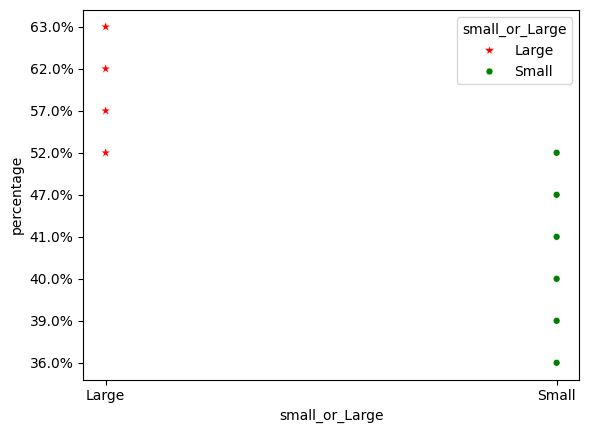

In [61]:
# make a seaborn scatter plot with percentages as y with small as green and large as red
sns.scatterplot(data=df, x='small_or_Large', y='percentage',
                hue='small_or_Large', palette=['red', 'green'],
                style = 'small_or_Large', markers = ['*', 'o'],
                size = 'small_or_Large', sizes = [60,25])

# Solution - variant 3


In [62]:
df2.to_csv('grangers_analysis.csv')